<a href="https://colab.research.google.com/github/kumar1607/Twitter_Sentiment_Analysis-NLP-/blob/main/Twitter_Sentiment_Analysis(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Information**

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

1.Regular expressions are powerful tools for pattern matching and text manipulation.

re functions are:

Extract email addresses from a document.
Validate user input to ensure it adheres to a certain format.
Clean and normalize text data by removing unwanted characters or formatting

2.functionalities of string

Converting text to lowercase or uppercase.
Removing leading/trailing whitespace characters.
Replacing specific characters or patterns in text

3.Natural Language Toolkit(nltk)


It offers a wide range of capabilities, including:

Tokenization: Breaking down text into smaller units like words, sentences, etc.

Parts-of-speech (POS) tagging: Assigning grammatical labels (e.g., noun, verb, adjective) to words.

Stemming/lemmatization: Reducing words to their base forms (e.g., "running" -> "run").

Named entity recognition (NER): Identifying and classifying named entities like people, locations, organizations.

Sentiment analysis: Determining the emotional tone of text (positive, negative, neutral).

In [2]:
df = pd.read_csv('Twitter Sentiments.csv')
df.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


**Preprocessing the dataset**

In [32]:
# removing pattern in the input text


# Define a function to remove specific patterns from the input text
def remove_unwanted_patterns(text_to_clean, pattern_to_remove):

   # Step 1: Find all occurrences of the pattern in the text
   found_patterns = re.findall(pattern_to_remove, text_to_clean)  # Store matches in a list

   # Step 2: Iterate through each found pattern and remove it
   for pattern_instance in found_patterns:
       text_to_clean = re.sub(pattern_instance, "", text_to_clean)  # Replace with empty string

   # Step 3: Return the modified text
   return text_to_clean

In [5]:
df.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [34]:
# removing twitter handles example:(@user)
df['clean_tweet'] = np.vectorize(remove_unwanted_patterns)(df['tweet'], "@[\w]*")

In [35]:
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                         clean_tweet  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can't use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide: society now    #motivation

In [8]:
# removing special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                         clean_tweet  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can t use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide  society now    #motivation

In [9]:
# removing short words like "is,the,for,as,i and many more"
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                         clean_tweet  
0  when father dysfunctional selfish drags kids i...  
1  thanks #lyft credit cause they offer wheelchai...  
2                                bihday your majesty  
3                         #model love take with time  
4                     factsguide society #motivation

In [10]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [11]:
# stemming the words

# love,loving,loved,lovely  all are converted into love

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [12]:
# combining words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                         clean_tweet  
0  when father dysfunct selfish drag kid into dys...  
1  thank #lyft credit caus they offer wheelchair ...  
2                                bihday your majesti  
3                         #model love take with time  
4                           factsguid societi #motiv

**Exploratory Data Analysis**

In [13]:
!pip install wordcloud

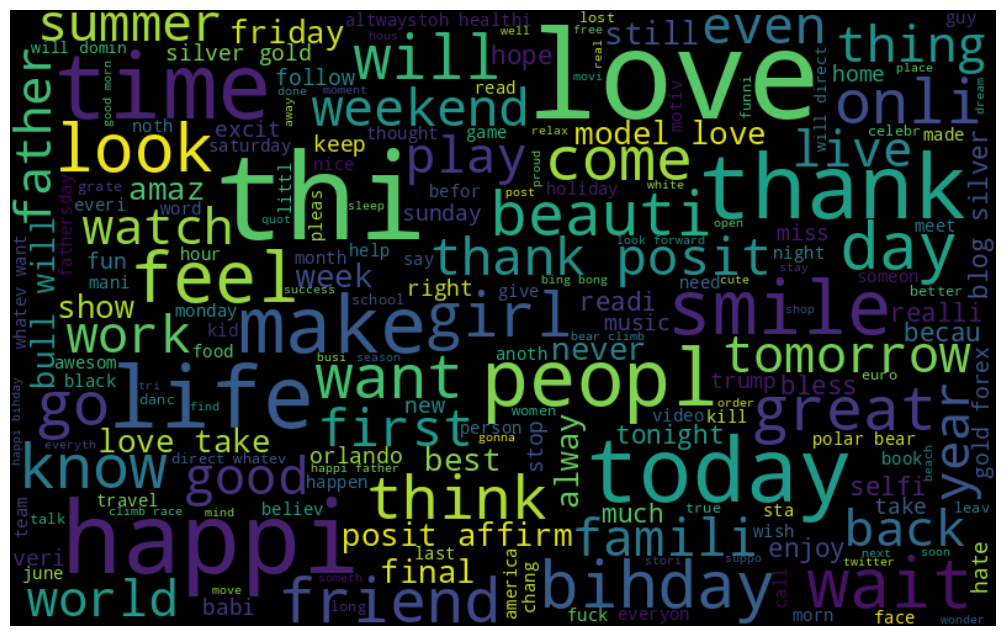

In [14]:
# lets visualize the frequent words

all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

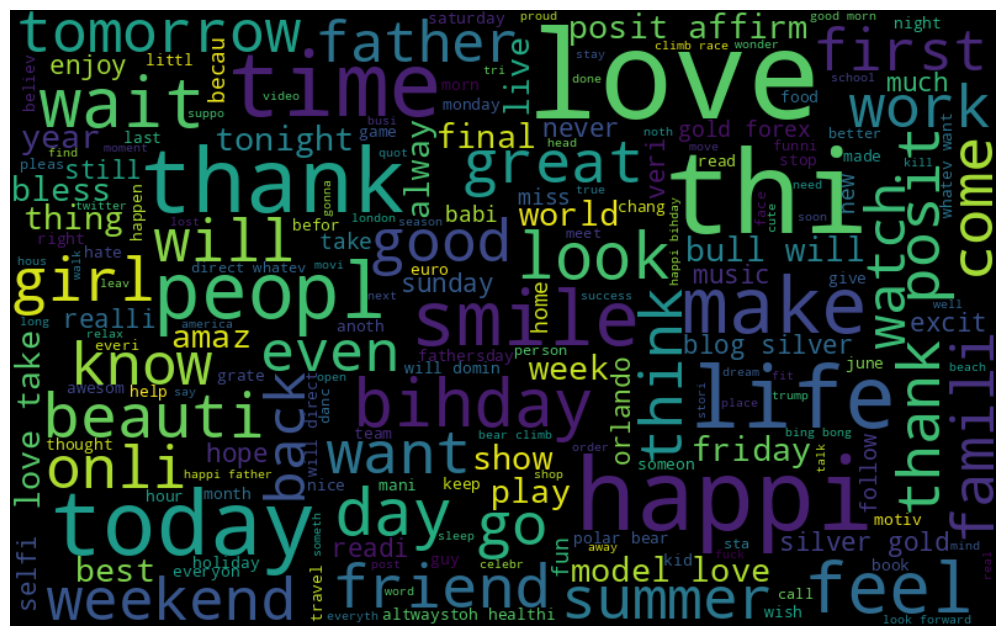

In [15]:
# lets visualise the frequent positive words

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

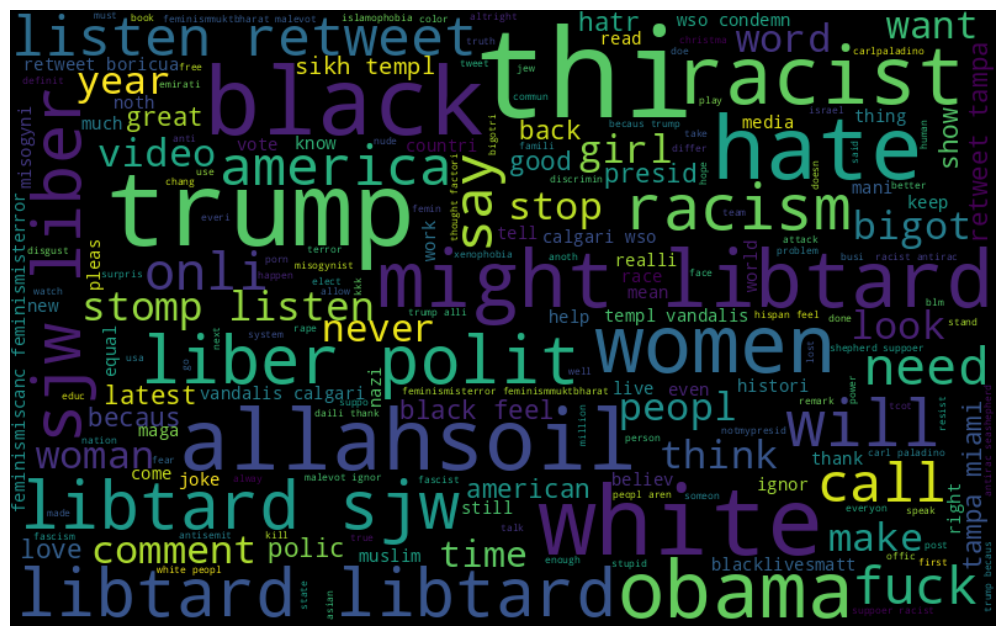

In [16]:
# lets visualise the frequent positive words

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
# extracting the hashtags
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [18]:
# extracting hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extracting hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [19]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [20]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [21]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [22]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

Hashtag  Count
0        run     72
1       lyft      2
2  disapoint      1
3   getthank      2
4      model    375

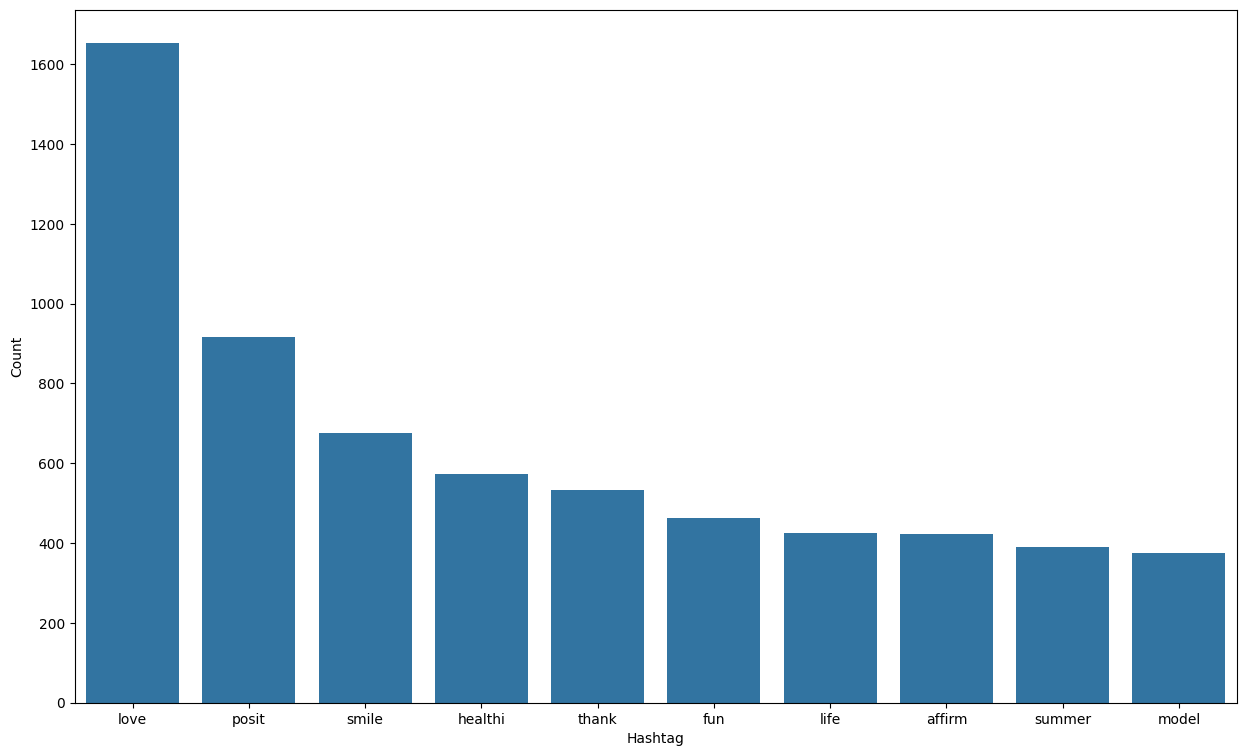

In [23]:
# selecting top 10 hashtags for  POSITIVE
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [24]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

Hashtag  Count
0           cnn     10
1      michigan      2
2          tcot     14
3     australia      6
4  opkillingbay      5

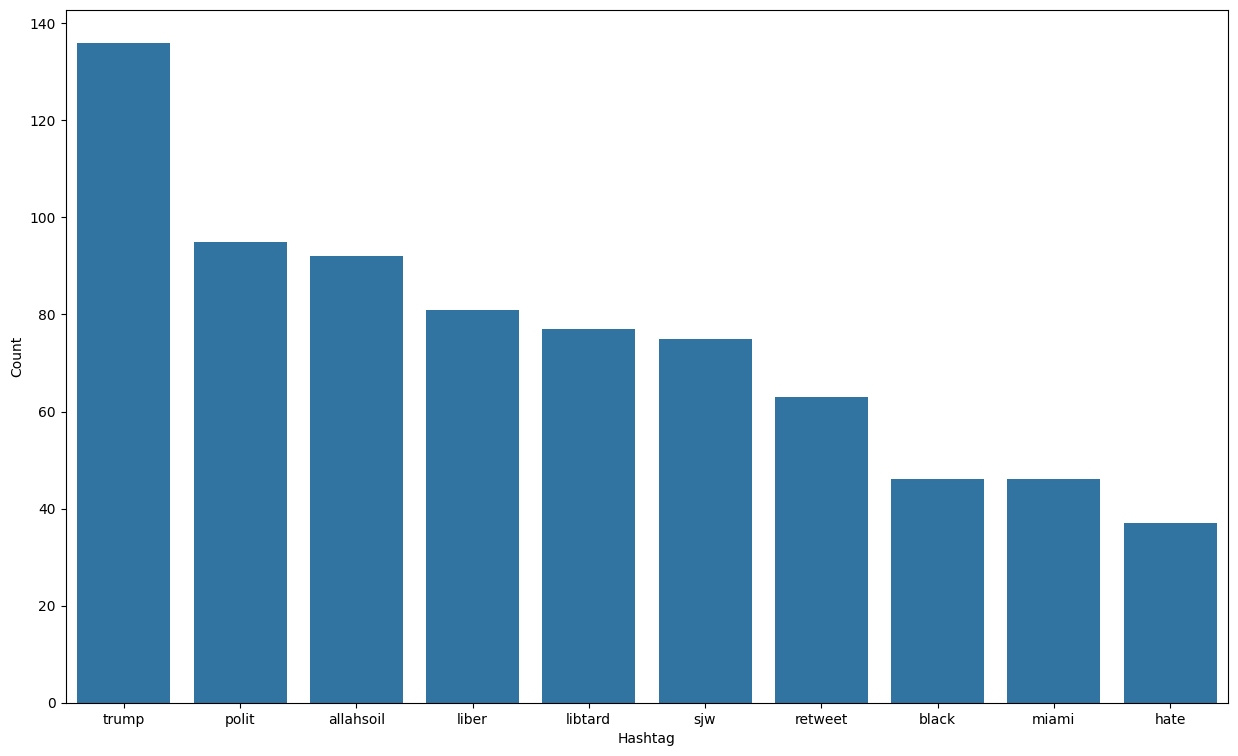

In [25]:
# selecting top 10 hashtags for NEGATIVE
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

Input data Splitting into train and test data

In [26]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

**Model Training**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [29]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [30]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.49763033175355453

In [31]:
accuracy_score(y_test,pred)

0.9469403078463271